### Data Analyse

In [1]:
import sys
sys.path.insert(0, '/Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/')
from backend.ml_pipe.data.database.mongodb import MongoDb
from backend.ml_pipe.models.xgboost.model import XGBoostModel

import pandas as pd

In [ ]:
# MongoDB-Client
mongo_client = MongoDb()
result = mongo_client.get_all('classification_dataset')
raw_data = result.get('data', [])


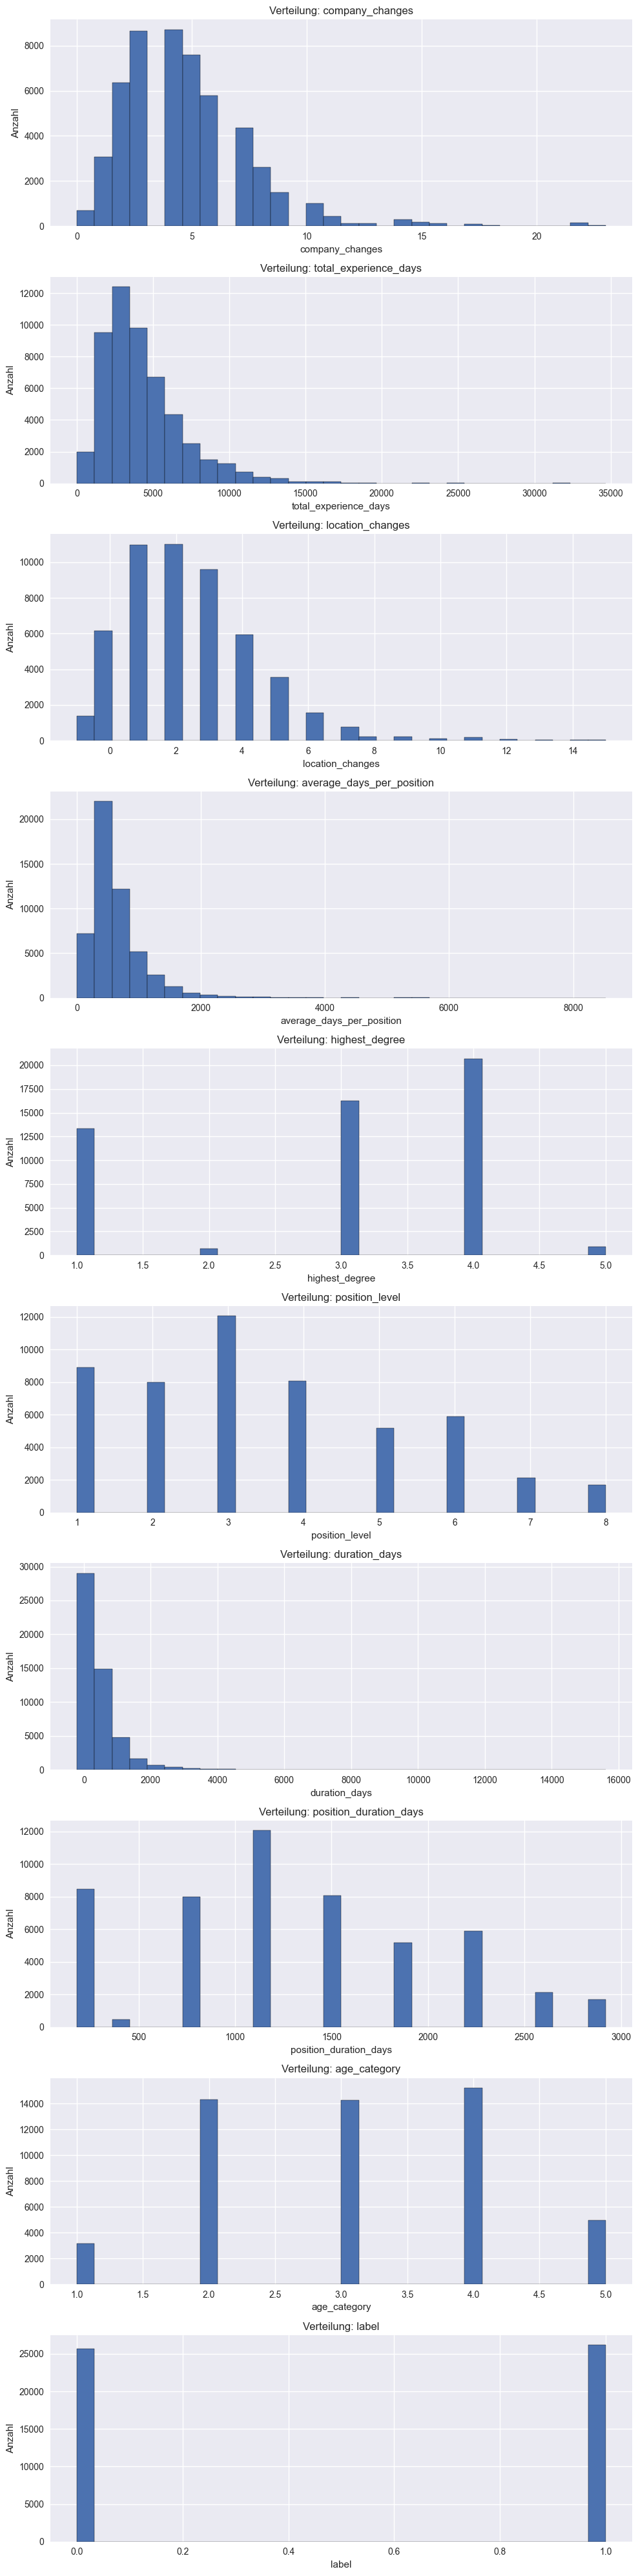

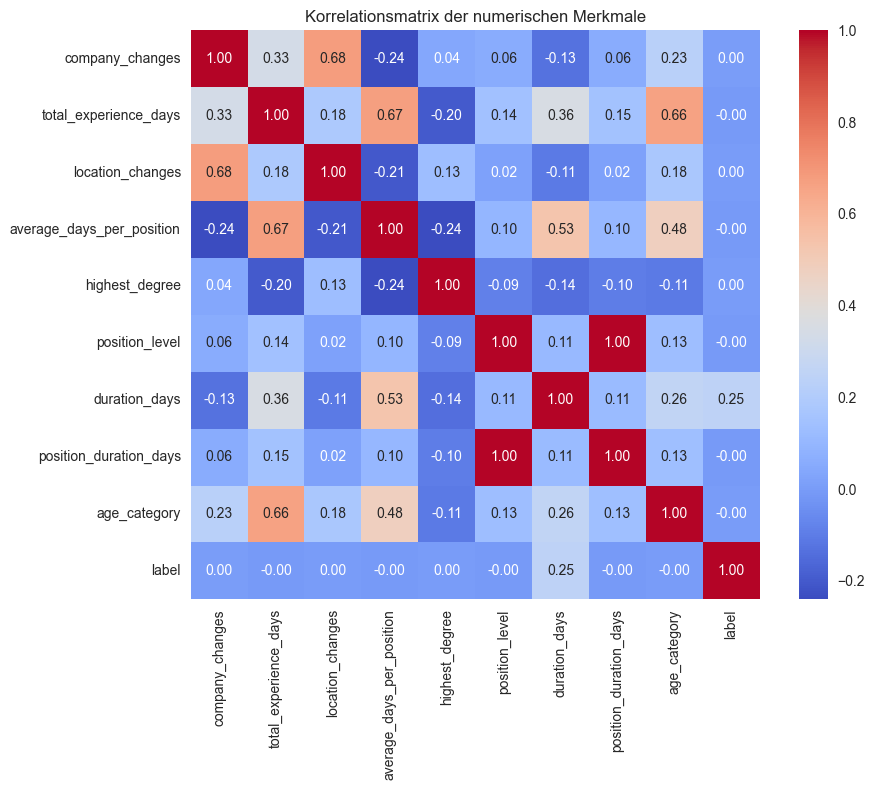

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flattened = []
for entry in raw_data:
    flat = entry["features"].copy()
    flat["label"] = entry.get("label", None)
    flattened.append(flat)

df = pd.DataFrame(flattened)

numerische_spalten = df.select_dtypes(include=['number']).columns.tolist()

plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(nrows=len(numerische_spalten), figsize=(10, 4 * len(numerische_spalten)))
if len(numerische_spalten) == 1:
    axes = [axes]

for ax, col in zip(axes, numerische_spalten):
    ax.hist(df[col].dropna(), bins=30, edgecolor='black')
    ax.set_title(f"Verteilung: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Anzahl")
    ax.grid(True)

plt.tight_layout()
plt.show()

correlation_matrix = df[numerische_spalten].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatrix der numerischen Merkmale")
plt.tight_layout()
plt.show()

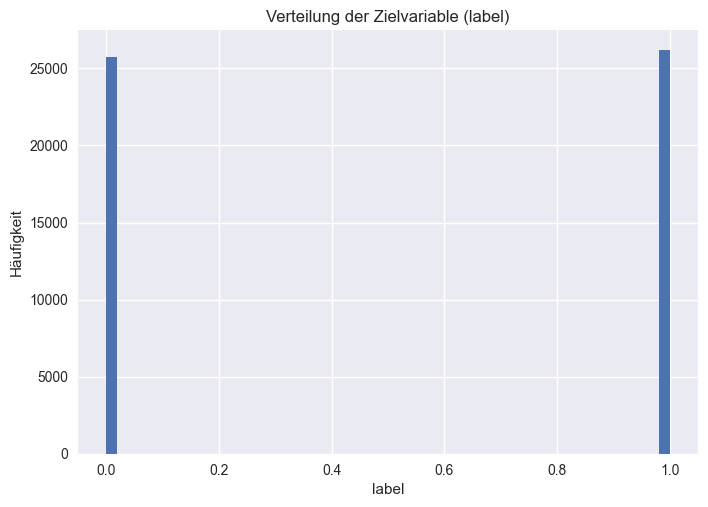

In [7]:
plt.hist(df["label"], bins=50)
plt.title("Verteilung der Zielvariable (label)")
plt.xlabel("label")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()